In [18]:
#importing pandas to read the csv file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#creating dataframe to store the csv file
msg_df=pd.read_csv('messages.csv')

In [3]:
#printing the data frame to see what it consist of
msg_df

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [5]:
#counting the number of 0 and 1 labels
msg_df['label'].value_counts()

0    2412
1     481
Name: label, dtype: int64

In [8]:
#Removing the subject column as it is not required for our goal
msg_df.drop('subject',axis=1,inplace=True)

In [9]:
#data cleaning and pre-processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [10]:
#Applying stemming technique inorder to decrese the length of the message in message column
ps= PorterStemmer()
Corpus=[]
for i in range(0,len(msg_df)):
    review=re.sub('[^a-zA-Z]',' ',msg_df['message'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    Corpus.append(review)
    

In [11]:
#creating a bag of words to change word into vectors
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(Corpus).toarray()
y=msg_df.iloc[:,-1]

In [12]:
#Applying train test split to split the data into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [13]:
#Using multinomialNb and support vector machine to predict the result and Confusion matrix to measure the performance
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



SVC()


ACCURACY_SCORE = 0.9533678756476683


[[474   0]
 [ 27  78]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


MultinomialNB()


ACCURACY_SCORE = 0.9827288428324698


[[467   7]
 [  3 102]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


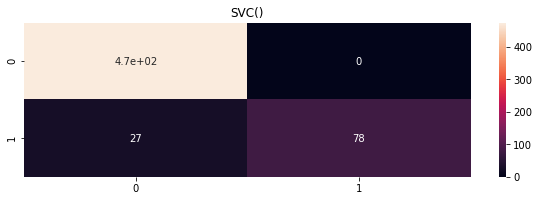

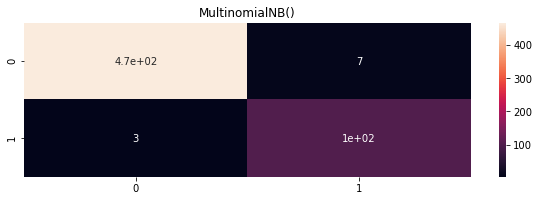

In [25]:
Model= []
score= []
model=[SVC(),MultinomialNB()]
for models in model:
    print("\n")
    Model.append(models)
    models.fit(x_train,y_train)
    print(models)
    prediction=models.predict(x_test)
    print("\n")
    acc_score=accuracy_score(y_test,prediction)
    print("ACCURACY_SCORE =",acc_score)
    score.append(acc_score*100)
    print("\n")
    cm=confusion_matrix(y_test,prediction)
    print(cm)
    print("\n") 
    plt.figure(figsize=(10,30))
    plt.subplot(911)
    plt.title(models)
    print(sns.heatmap(cm,annot=True))  

In [26]:
MN=MultinomialNB()
MN.fit(x_train,y_train)
prediction=MN.predict(x_test)
acc_score=accuracy_score(prediction,y_test)
print("Accuracy Score =", acc_score)

Accuracy Score = 0.9827288428324698
